<a href="https://colab.research.google.com/github/Rishika70/Nature_Based_topology/blob/main/Nature_Based_Topology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Sustainable Synergy Model highlights the interconnectedness of ecological elements, emphasizing how their cooperative relationships can lead to more resilient and sustainable ecosystems. This model can be applied in various contexts, including urban planning, conservation strategies, and sustainability practices, fostering a holistic understanding of environmental dynamics and promoting practices that enhance the health of both natural systems and human communities.

# Set Up Environements

In [1]:
# Import necessary libraries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)


#Claude and JARVIS Agents
Each agent will have distinct roles and objectives. Claude’s decisions are guided by empathy and relational awareness, while JARVIS focuses on systemic, long-term impacts.

In [2]:
# Agent class definition
class Agent:
    def __init__(self, name, empathy_factor, rational_factor):
        self.name = name
        self.empathy_factor = empathy_factor  # Weights relational awareness
        self.rational_factor = rational_factor  # Weights long-term impact awareness
        self.path_outcome = 0  # Track outcome of the chosen path

    def make_decision(self, choices):
        """
        Decision-making based on empathy and rational factors.
        Choices are a list of tuples (outcome, impact_factor).
        """
        weighted_choices = [
            (outcome * self.empathy_factor + impact * self.rational_factor)
            for outcome, impact in choices
        ]
        choice_idx = np.argmax(weighted_choices)
        return choices[choice_idx], weighted_choices[choice_idx]

    def update_path_outcome(self, outcome):
        self.path_outcome += outcome

# Instantiate Claude and JARVIS with different empathy and rational factors
claude = Agent(name="Claude", empathy_factor=0.7, rational_factor=0.3)
jarvis = Agent(name="JARVIS", empathy_factor=0.3, rational_factor=0.7)


In [3]:
# Decision simulation function
def simulate_decision(agent, path="Start"):
    """
    Recursive function to simulate agent decisions through the environment.
    """
    if path not in decision_paths:
        return  # End of the decision tree path

    # Extract available choices for the current path
    choices = [(outcome, impact) for _, outcome, impact in decision_paths[path]]

    # Agent makes a decision
    (chosen_path, outcome), weighted_value = agent.make_decision(choices) # Corrected: Removed 'impact' from unpacking
    # Access impact from the path details in decision_paths
    impact = next(impact for _, outcome_val, impact in decision_paths[path] if outcome_val == outcome) # find impact value associated with the chosen outcome
    print(f"{agent.name} chooses {chosen_path} with weighted outcome: {weighted_value:.2f}")


# Nature Based Topology

## Visualize and Compare Outcomes
After each agent has made its decisions, we’ll visualize the decision paths to compare their cumulative outcomes.


--- Generation 1 ---
Claude's Decisions:
Claude chooses Reforestation with weighted outcome: 12.90
Claude chooses Agroforestry with weighted outcome: 7.40

JARVIS's Decisions:
JARVIS chooses Wetlands Restoration with weighted outcome: 11.40
JARVIS chooses Riverbank Planting with weighted outcome: 8.50
Generation 1 Outcome for Claude: 23
Generation 1 Outcome for JARVIS: 15

--- Generation 2 ---
Claude's Decisions:
Claude chooses Reforestation with weighted outcome: 12.90
Claude chooses Agroforestry with weighted outcome: 7.40

JARVIS's Decisions:
JARVIS chooses Wetlands Restoration with weighted outcome: 11.40
JARVIS chooses Riverbank Planting with weighted outcome: 8.50
Generation 2 Outcome for Claude: 46
Generation 2 Outcome for JARVIS: 30

--- Generation 3 ---
Claude's Decisions:
Claude chooses Reforestation with weighted outcome: 12.80
Claude chooses Agroforestry with weighted outcome: 7.40

JARVIS's Decisions:
JARVIS chooses Wetlands Restoration with weighted outcome: 11.40
JARVIS

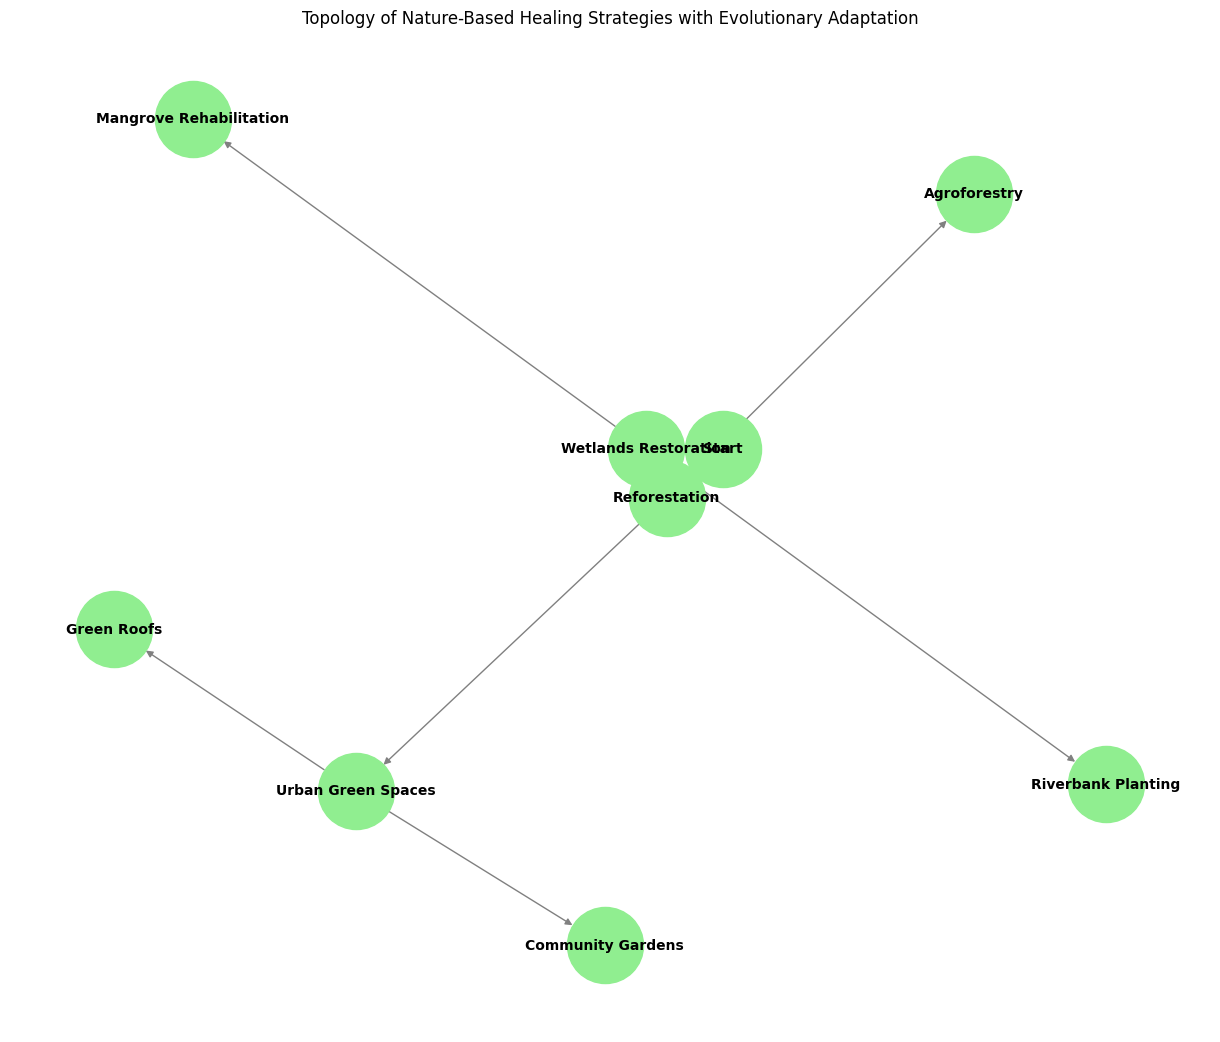


Claude's empathy-driven cumulative outcome: 113
JARVIS's system-driven cumulative outcome: 74


In [6]:
!pip install networkx matplotlib numpy

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# Agent class definition
class Agent:
    def __init__(self, name, empathy_factor, rational_factor):
        self.name = name
        self.empathy_factor = empathy_factor
        self.rational_factor = rational_factor
        self.path_outcome = 0

    def make_decision(self, choices):
        weighted_choices = [
            (outcome * self.empathy_factor + impact * self.rational_factor)
            for strategy, outcome, impact in choices
        ]
        choice_idx = np.argmax(weighted_choices)
        return choices[choice_idx], weighted_choices[choice_idx]

    def update_path_outcome(self, outcome):
        self.path_outcome += outcome

# Instantiate Claude and JARVIS
claude = Agent(name="Claude", empathy_factor=0.7, rational_factor=0.3)
jarvis = Agent(name="JARVIS", empathy_factor=0.3, rational_factor=0.7)

# Define initial decision paths with nature-based strategies
decision_paths = {
    "Start": [("Reforestation", 15, 8), ("Wetlands Restoration", 10, 12)],
    "Reforestation": [("Urban Green Spaces", 6, 7), ("Agroforestry", 8, 6)],
    "Wetlands Restoration": [("Mangrove Rehabilitation", 12, 5), ("Riverbank Planting", 5, 10)],
    "Urban Green Spaces": [("Community Gardens", 4, 5), ("Green Roofs", 5, 4)],
}

# Evolutionary Algorithm to adapt and optimize paths
def evolutionary_algorithm(paths, generations=10, mutation_rate=0.1):
    for generation in range(generations):
        print(f"\n--- Generation {generation + 1} ---")

        # Mutate decision paths to simulate natural adaptation
        for path, strategies in paths.items():
            for i, (strategy, outcome, impact) in enumerate(strategies):
                if random.random() < mutation_rate:
                    # Mutate outcome and impact to reflect evolutionary changes
                    outcome = max(0, outcome + random.randint(-2, 3))  # Random adjustment
                    impact = max(0, impact + random.randint(-2, 3))  # Random adjustment
                    paths[path][i] = (strategy, outcome, impact)  # Update strategy

        # Simulate decisions for agents after mutation
        print("Claude's Decisions:")
        simulate_decision(claude, paths=paths)
        print("\nJARVIS's Decisions:")
        simulate_decision(jarvis, paths=paths)

        # Display cumulative outcomes for each agent per generation
        print(f"Generation {generation + 1} Outcome for Claude: {claude.path_outcome}")
        print(f"Generation {generation + 1} Outcome for JARVIS: {jarvis.path_outcome}")

# Recursive decision simulation function
def simulate_decision(agent, path="Start", paths=decision_paths):
    if path not in paths:
        return  # End of the decision tree path

    choices = [(strategy, outcome, impact) for strategy, outcome, impact in paths[path]]
    (chosen_path, outcome, impact), weighted_value = agent.make_decision(choices)
    agent.update_path_outcome(outcome)
    print(f"{agent.name} chooses {chosen_path} with weighted outcome: {weighted_value:.2f}")

    # Recurse for the chosen path
    simulate_decision(agent, chosen_path, paths=paths)

# Create the graph object G
G = nx.DiGraph()
for node, paths in decision_paths.items():
    G.add_node(node)
    for path, outcome, impact in paths:
        G.add_edge(node, path, outcome=outcome, impact=impact)

# Run the evolutionary algorithm
evolutionary_algorithm(decision_paths, generations=5, mutation_rate=0.2)

# Plot the graph of decision paths
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightgreen", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Topology of Nature-Based Healing Strategies with Evolutionary Adaptation")
plt.show()

# Outcome summary
print(f"\nClaude's empathy-driven cumulative outcome: {claude.path_outcome}")
print(f"JARVIS's system-driven cumulative outcome: {jarvis.path_outcome}")


#Feedback Loops for Continuous Learning

In [8]:
import numpy as np
import random

# Agent class with feedback adjustment
class Agent:
    def __init__(self, name, empathy_factor, rational_factor):
        self.name = name
        self.empathy_factor = empathy_factor
        self.rational_factor = rational_factor
        self.path_outcome = 0

    def make_decision(self, choices):
        weighted_choices = [
            (outcome * self.empathy_factor + impact * self.rational_factor)
            for strategy, outcome, impact in choices
        ]
        choice_idx = np.argmax(weighted_choices)
        return choices[choice_idx], weighted_choices[choice_idx]

    def update_path_outcome(self, outcome):
        self.path_outcome += outcome

    def adjust_weights(self, success_score, target_score):
        if success_score > target_score:
            self.empathy_factor = min(1.0, self.empathy_factor + 0.05)
            self.rational_factor = max(0.0, self.rational_factor - 0.05)
        else:
            self.empathy_factor = max(0.0, self.empathy_factor - 0.05)
            self.rational_factor = min(1.0, self.rational_factor + 0.05)

# Instantiate agents
claude = Agent(name="Claude", empathy_factor=0.7, rational_factor=0.3)
jarvis = Agent(name="JARVIS", empathy_factor=0.3, rational_factor=0.7)

# Define decision paths and initial target score for feedback loop
decision_paths = {
    "Start": [("Reforestation", 15, 8), ("Wetlands Restoration", 10, 12)],
    "Reforestation": [("Urban Green Spaces", 6, 7), ("Agroforestry", 8, 6)],
    "Wetlands Restoration": [("Mangrove Rehabilitation", 12, 5), ("Riverbank Planting", 5, 10)],
    "Urban Green Spaces": [("Community Gardens", 4, 5), ("Green Roofs", 5, 4)],
}

# Feedback loop for continuous learning
def feedback_loop(agent, paths, generations=5, target_score=50):
    for gen in range(generations):
        print(f"\n--- Generation {gen + 1} ---")

        # Reset outcome each generation
        agent.path_outcome = 0
        simulate_decision(agent, paths=paths)

        # Calculate success score
        success_score = agent.path_outcome
        print(f"{agent.name}'s Success Score for Generation {gen + 1}: {success_score}")

        # Adjust weights based on success
        agent.adjust_weights(success_score, target_score)

        # Display new empathy and rational factors
        print(f"{agent.name}'s Updated Empathy Factor: {agent.empathy_factor}")
        print(f"{agent.name}'s Updated Rational Factor: {agent.rational_factor}")

# Recursive decision simulation function
def simulate_decision(agent, path="Start", paths=decision_paths):
    if path not in paths:
        return  # End of the decision tree path

    # Choices for current path
    choices = [(strategy, outcome, impact) for strategy, outcome, impact in paths[path]]
    (chosen_path, outcome, impact), weighted_value = agent.make_decision(choices)
    agent.update_path_outcome(outcome)
    print(f"{agent.name} chooses {chosen_path} with weighted outcome: {weighted_value:.2f}")

    # Recurse for chosen path
    simulate_decision(agent, chosen_path, paths=paths)

# Run the feedback loop for Claude and JARVIS
print("\n--- Feedback Loop for Claude ---")
feedback_loop(claude, paths=decision_paths, generations=5, target_score=50)
print("\n--- Feedback Loop for JARVIS ---")
feedback_loop(jarvis, paths=decision_paths, generations=5, target_score=50)



--- Feedback Loop for Claude ---

--- Generation 1 ---
Claude chooses Reforestation with weighted outcome: 12.90
Claude chooses Agroforestry with weighted outcome: 7.40
Claude's Success Score for Generation 1: 23
Claude's Updated Empathy Factor: 0.6499999999999999
Claude's Updated Rational Factor: 0.35

--- Generation 2 ---
Claude chooses Reforestation with weighted outcome: 12.55
Claude chooses Agroforestry with weighted outcome: 7.30
Claude's Success Score for Generation 2: 23
Claude's Updated Empathy Factor: 0.5999999999999999
Claude's Updated Rational Factor: 0.39999999999999997

--- Generation 3 ---
Claude chooses Reforestation with weighted outcome: 12.20
Claude chooses Agroforestry with weighted outcome: 7.20
Claude's Success Score for Generation 3: 23
Claude's Updated Empathy Factor: 0.5499999999999998
Claude's Updated Rational Factor: 0.44999999999999996

--- Generation 4 ---
Claude chooses Reforestation with weighted outcome: 11.85
Claude chooses Agroforestry with weighted o

#Expanded Decision Paths with Advanced Strategies
Here’s how the decision topology might look with more layered, nature-based, and technological approaches. Each strategy will include specific sub-strategies and hierarchical choices that Claude and JARVIS can evaluate and learn from.

In [9]:
# Expanded decision paths with nature-based and technology-focused strategies
decision_paths = {
    "Start": [
        ("Waste-to-Energy", 12, 6),
        ("Recycling Optimization", 10, 8),
        ("Advanced Composting", 9, 9),
    ],
    "Waste-to-Energy": [
        ("Incineration with Emission Control", 7, 5),
        ("Biogas Production", 8, 7),
        ("Pyrolysis", 9, 6)
    ],
    "Recycling Optimization": [
        ("AI-driven Sorting", 12, 8),
        ("Material Recovery Facilities (MRF)", 10, 7),
        ("Advanced Robotics for Recycling", 11, 9),
    ],
    "Advanced Composting": [
        ("Microbial Enhancements", 11, 10),
        ("Aerated Composting", 8, 9),
        ("Vermicomposting", 7, 8)
    ],
    "Incineration with Emission Control": [
        ("High-Efficiency Filtration", 8, 6),
        ("Carbon Capture Integration", 9, 8)
    ],
    "Biogas Production": [
        ("Anaerobic Digestion Optimization", 8, 7),
        ("Methane Capture for Energy", 9, 7)
    ],
    "Pyrolysis": [
        ("Biochar Production", 7, 9),
        ("Fuel Recovery", 8, 8)
    ],
    "AI-driven Sorting": [
        ("Optical Recognition Sorting", 10, 7),
        ("Robotic Arm Sorting", 11, 8)
    ],
    "Material Recovery Facilities (MRF)": [
        ("Metals Extraction", 9, 8),
        ("Paper Recovery and Processing", 7, 7)
    ],
    "Advanced Robotics for Recycling": [
        ("Autonomous Waste Detection", 10, 9),
        ("High-Precision Sorting", 9, 8)
    ],
    "Microbial Enhancements": [
        ("Bacterial Enzyme Cultivation", 10, 9),
        ("Fungi-based Decomposition", 9, 8)
    ],
    "Aerated Composting": [
        ("Forced Aeration", 8, 7),
        ("Moisture Control Optimization", 7, 6)
    ],
    "Vermicomposting": [
        ("Earthworm Cultivation", 6, 5),
        ("Nutrient-Rich Compost Creation", 8, 6)
    ]
}

# Agent class with feedback and decision-making (unchanged)
class Agent:
    def __init__(self, name, empathy_factor, rational_factor):
        self.name = name
        self.empathy_factor = empathy_factor
        self.rational_factor = rational_factor
        self.path_outcome = 0

    def make_decision(self, choices):
        weighted_choices = [
            (outcome * self.empathy_factor + impact * self.rational_factor)
            for strategy, outcome, impact in choices
        ]
        choice_idx = np.argmax(weighted_choices)
        return choices[choice_idx], weighted_choices[choice_idx]

    def update_path_outcome(self, outcome):
        self.path_outcome += outcome

    def adjust_weights(self, success_score, target_score):
        if success_score > target_score:
            self.empathy_factor = min(1.0, self.empathy_factor + 0.05)
            self.rational_factor = max(0.0, self.rational_factor - 0.05)
        else:
            self.empathy_factor = max(0.0, self.empathy_factor - 0.05)
            self.rational_factor = min(1.0, self.rational_factor + 0.05)

# Recursive decision simulation function
def simulate_decision(agent, path="Start", paths=decision_paths):
    if path not in paths:
        return  # End of the decision tree path

    # Choices for current path
    choices = [(strategy, outcome, impact) for strategy, outcome, impact in paths[path]]
    (chosen_path, outcome, impact), weighted_value = agent.make_decision(choices)
    agent.update_path_outcome(outcome)
    print(f"{agent.name} chooses {chosen_path} with weighted outcome: {weighted_value:.2f}")

    # Recurse for chosen path
    simulate_decision(agent, chosen_path, paths=paths)

# Instantiate agents with empathy and rational weights
claude = Agent(name="Claude", empathy_factor=0.7, rational_factor=0.3)
jarvis = Agent(name="JARVIS", empathy_factor=0.3, rational_factor=0.7)

# Feedback loop for each agent
def feedback_loop(agent, paths, generations=5, target_score=50):
    for gen in range(generations):
        print(f"\n--- Generation {gen + 1} ---")

        # Reset outcome each generation
        agent.path_outcome = 0
        simulate_decision(agent, paths=paths)

        # Calculate success score
        success_score = agent.path_outcome
        print(f"{agent.name}'s Success Score for Generation {gen + 1}: {success_score}")

        # Adjust weights based on success
        agent.adjust_weights(success_score, target_score)

        # Display new empathy and rational factors
        print(f"{agent.name}'s Updated Empathy Factor: {agent.empathy_factor}")
        print(f"{agent.name}'s Updated Rational Factor: {agent.rational_factor}")

# Run the feedback loop for both agents with expanded decision paths
print("\n--- Feedback Loop for Claude ---")
feedback_loop(claude, paths=decision_paths, generations=5, target_score=50)
print("\n--- Feedback Loop for JARVIS ---")
feedback_loop(jarvis, paths=decision_paths, generations=5, target_score=50)



--- Feedback Loop for Claude ---

--- Generation 1 ---
Claude chooses Waste-to-Energy with weighted outcome: 10.20
Claude chooses Pyrolysis with weighted outcome: 8.10
Claude chooses Fuel Recovery with weighted outcome: 8.00
Claude's Success Score for Generation 1: 29
Claude's Updated Empathy Factor: 0.6499999999999999
Claude's Updated Rational Factor: 0.35

--- Generation 2 ---
Claude chooses Waste-to-Energy with weighted outcome: 9.90
Claude chooses Pyrolysis with weighted outcome: 7.95
Claude chooses Fuel Recovery with weighted outcome: 8.00
Claude's Success Score for Generation 2: 29
Claude's Updated Empathy Factor: 0.5999999999999999
Claude's Updated Rational Factor: 0.39999999999999997

--- Generation 3 ---
Claude chooses Waste-to-Energy with weighted outcome: 9.60
Claude chooses Pyrolysis with weighted outcome: 7.80
Claude chooses Fuel Recovery with weighted outcome: 8.00
Claude's Success Score for Generation 3: 29
Claude's Updated Empathy Factor: 0.5499999999999998
Claude's Up

Explanation of Expanded Strategies
Top-Level Strategies:

Waste-to-Energy: Methods like incineration, biogas, and pyrolysis to convert waste to usable energy.
Recycling Optimization: Advanced sorting and material recovery techniques with AI and robotics.
Advanced Composting: Techniques using microbial enhancements and controlled environments for efficient composting.
Sub-Strategies:

Waste-to-Energy includes sub-paths for different methods like Incineration with Emission Control and Biogas Production.
Recycling Optimization breaks down into options like AI-driven Sorting and Material Recovery Facilities.
Advanced Composting options include microbial methods like Microbial Enhancements and Vermicomposting.

#Approach to Integrate Real-Time Data

In [10]:
import requests
from bs4 import BeautifulSoup

def fetch_climate_data(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        # Assuming we find relevant metrics in specific tags or sections
        # For example, extracting data under a specific header or paragraph
        # Adjust based on actual structure of the page

        climate_info = []
        headers = soup.find_all('h2')  # Example; use actual header or tags
        paragraphs = soup.find_all('p')  # Example; adjust based on actual data

        for header, paragraph in zip(headers, paragraphs):
            if 'climate' in header.text.lower() or 'emission' in paragraph.text.lower():
                climate_info.append(paragraph.text.strip())

        return climate_info if climate_info else None

    except requests.exceptions.RequestException as e:
        print(f'Error fetching climate data: {e}')
        return None

# Fetch climate data from the provided URL
climate_url = 'https://community.wmo.int/en/climate-metadata#:~:text=Climate%20Metadata%20have%20a%20key,actual%20climate%20variability%20and%20change'
climate_data = fetch_climate_data(climate_url)

if climate_data:
    print("Fetched Climate Data:")
    for info in climate_data:
        print(info)
else:
    print("No climate data fetched.")



Fetched Climate Data:
More specially, station metadata refers to site/location, instrumentation, observation practices, calibration reports, site layout, site condition, site exposure, changes of location etc.. Climate Metadata have a key role in the process of creating datasets, as the knowledge of the station history provides increased confidence in the statistical techniques employed to ensure that the only variations that remain in a climate time series are due to actual climate variability and change. Meteorological data users other than the climatological community, working in fields like agrometeorology, engineering or aeronautics, also benefit from good metadata. These professionals also need to extract the maximum accuracy from the observations, and often compare data taken in different places or times. A complete knowledge of the measuring conditions will help them to achieve this goal.
A full list of metadata, which ideally should be stored, is described in a technical docum

#Integrate Climate Data into the Feedback Loop
We’ll incorporate this fetched data into the agents' feedback loop, adjusting empathy and rationality factors to reflect current environmental information.

In [11]:
import numpy as np

# Adjusted Agent class with real-time data influence
class Agent:
    def __init__(self, name, empathy_factor, rational_factor):
        self.name = name
        self.empathy_factor = empathy_factor
        self.rational_factor = rational_factor
        self.path_outcome = 0

    def make_decision(self, choices):
        weighted_choices = [
            (outcome * self.empathy_factor + impact * self.rational_factor)
            for strategy, outcome, impact in choices
        ]
        choice_idx = np.argmax(weighted_choices)
        return choices[choice_idx], weighted_choices[choice_idx]

    def update_path_outcome(self, outcome):
        self.path_outcome += outcome

    def adjust_weights(self, success_score, target_score, climate_factor=1.0):
        # Adjust weights based on success and external climate factor
        if success_score > target_score:
            self.empathy_factor = min(1.0, self.empathy_factor + 0.05 * climate_factor)
            self.rational_factor = max(0.0, self.rational_factor - 0.05 * climate_factor)
        else:
            self.empathy_factor = max(0.0, self.empathy_factor - 0.05 * climate_factor)
            self.rational_factor = min(1.0, self.rational_factor + 0.05 * climate_factor)

# Function to simulate climate data impact
def calculate_climate_factor(climate_data):
    # Placeholder for calculating influence based on climate data
    climate_factor = 1.0
    if climate_data:
        for info in climate_data:
            if 'high emissions' in info.lower():
                climate_factor = 1.2
            elif 'low emissions' in info.lower():
                climate_factor = 0.8
    return climate_factor

# Feedback loop with climate data integration
def feedback_loop(agent, paths, generations=5, target_score=50, climate_data=None):
    for gen in range(generations):
        print(f"\n--- Generation {gen + 1} ---")

        # Reset outcome for each generation
        agent.path_outcome = 0
        simulate_decision(agent, paths=paths)

        # Calculate success score
        success_score = agent.path_outcome
        print(f"{agent.name}'s Success Score for Generation {gen + 1}: {success_score}")

        # Climate factor calculation based on real-time data
        climate_factor = calculate_climate_factor(climate_data)

        # Adjust weights based on success and climate factor
        agent.adjust_weights(success_score, target_score, climate_factor)

        # Display updated empathy and rational factors
        print(f"{agent.name}'s Updated Empathy Factor: {agent.empathy_factor}")
        print(f"{agent.name}'s Updated Rational Factor: {agent.rational_factor}")

# Instantiate agents with empathy and rational factors
claude = Agent(name="Claude", empathy_factor=0.7, rational_factor=0.3)
jarvis = Agent(name="JARVIS", empathy_factor=0.3, rational_factor=0.7)

# Run feedback loop with real-time climate data
print("\n--- Feedback Loop for Claude with Climate Data ---")
feedback_loop(claude, paths=decision_paths, generations=5, target_score=50, climate_data=climate_data)

print("\n--- Feedback Loop for JARVIS with Climate Data ---")
feedback_loop(jarvis, paths=decision_paths, generations=5, target_score=50, climate_data=climate_data)



--- Feedback Loop for Claude with Climate Data ---

--- Generation 1 ---
Claude chooses Waste-to-Energy with weighted outcome: 10.20
Claude chooses Pyrolysis with weighted outcome: 8.10
Claude chooses Fuel Recovery with weighted outcome: 8.00
Claude's Success Score for Generation 1: 29
Claude's Updated Empathy Factor: 0.6499999999999999
Claude's Updated Rational Factor: 0.35

--- Generation 2 ---
Claude chooses Waste-to-Energy with weighted outcome: 9.90
Claude chooses Pyrolysis with weighted outcome: 7.95
Claude chooses Fuel Recovery with weighted outcome: 8.00
Claude's Success Score for Generation 2: 29
Claude's Updated Empathy Factor: 0.5999999999999999
Claude's Updated Rational Factor: 0.39999999999999997

--- Generation 3 ---
Claude chooses Waste-to-Energy with weighted outcome: 9.60
Claude chooses Pyrolysis with weighted outcome: 7.80
Claude chooses Fuel Recovery with weighted outcome: 8.00
Claude's Success Score for Generation 3: 29
Claude's Updated Empathy Factor: 0.5499999999

Data Fetching: The fetch_climate_data() function scrapes relevant climate information from the specified URL, capturing climate metrics that influence waste management.
Climate Factor Calculation: The calculate_climate_factor() function interprets the climate data to influence empathy and rationality. For example, high emissions data might increase the focus on empathy for nature, while low emissions might reduce urgency.
Feedback Loop Integration: Each generation of decisions uses the climate_factor to adjust empathy and rational factors, creating dynamic agents that respond to real-world data.

#Keyword-Based Adjustments and Long-Term Influence

Claude chooses 15 with weighted outcome: 25.00 (Climate factor: 1.0, Long-term factor: 1.0)
JARVIS chooses 15 with weighted outcome: 25.00 (Climate factor: 1.0, Long-term factor: 1.0)


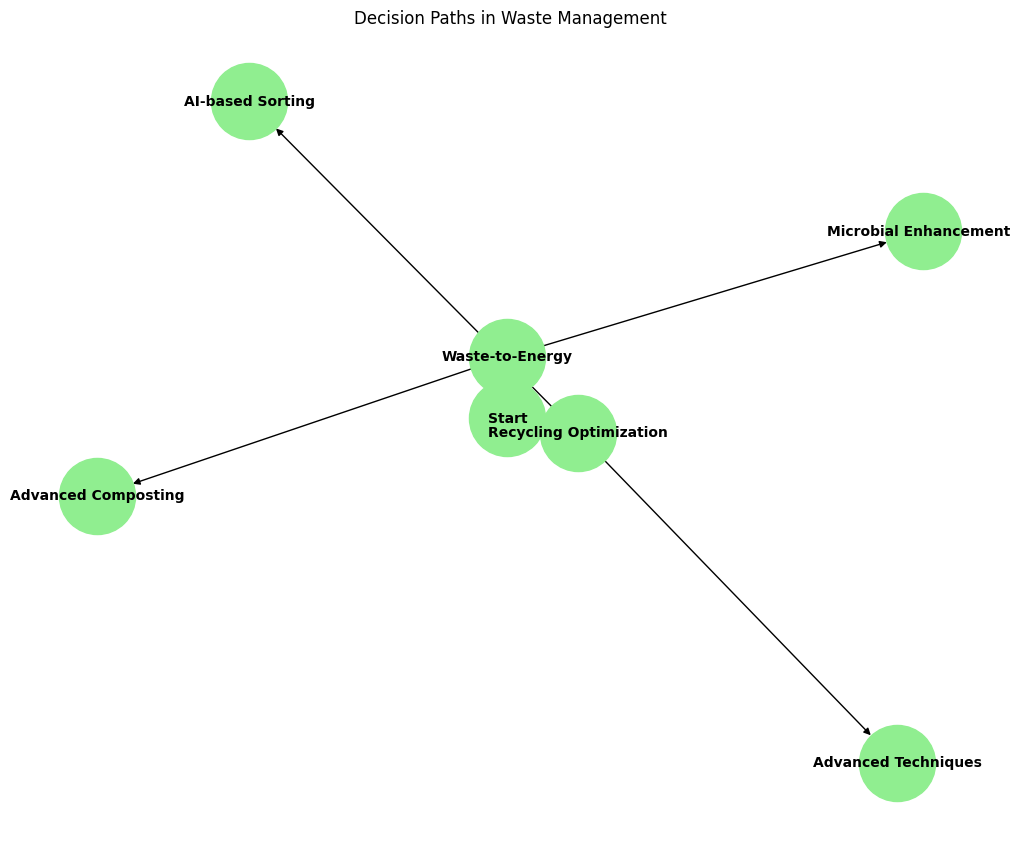


Final Outcome for Claude: 10
Final Outcome for JARVIS: 10
Claude's empathy-driven outcome: 10
JARVIS's system-driven outcome: 10


In [13]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

# Define climate impact keywords and their multipliers
KEYWORD_MULTIPLIERS = {
    "high emissions": 1.5,
    "temperature increase": 1.2,
    "extreme weather": 1.8,
    "reduced emissions": 0.8
}

# Initialize a deque for storing historical climate factors (for long-term influence)
history_size = 10
historical_climate_factors = deque(maxlen=history_size)  # Limit to the last 10 records

# Define Agent class with updated decision-making
class Agent:
    def __init__(self, name, empathy_factor, rational_factor):
        self.name = name
        self.empathy_factor = empathy_factor
        self.rational_factor = rational_factor
        self.path_outcome = 0

    def make_decision(self, choices, climate_factor, long_term_factor):
        """
        Decision-making based on empathy, rational factors, and climate impact.
        Choices are tuples of (outcome, impact_factor).
        """
        weighted_choices = [
            (outcome * (self.empathy_factor * climate_factor + self.rational_factor * long_term_factor) + impact)
            for outcome, impact in choices
        ]
        choice_idx = np.argmax(weighted_choices)
        return choices[choice_idx], weighted_choices[choice_idx]

    def update_path_outcome(self, outcome):
        self.path_outcome += outcome

# Calculate climate factor based on keywords
def calculate_climate_factor(climate_data):
    base_climate_factor = 1.0
    for keyword, multiplier in KEYWORD_MULTIPLIERS.items():
        if keyword in climate_data:
            base_climate_factor *= multiplier
    return base_climate_factor

# Function to fetch and parse climate data for keywords
def fetch_climate_data():
    url = 'https://community.wmo.int/en/climate-metadata'
    try:
        response = requests.get(url)
        response.raise_for_status()
        # Here, you could add more specific parsing of response.text to extract relevant keywords
        climate_data_text = response.text
        return climate_data_text
    except requests.exceptions.RequestException as e:
        print(f"Error fetching climate data: {e}")
        return ""

# Simulate decision-making
def simulate_decision(agent, path="Start"):
    if path not in decision_paths:
        return  # End of decision tree path

    # Extract available choices for the current path
    choices = [(outcome, impact) for _, outcome, impact in decision_paths[path]]

    # Calculate climate factor and update historical records
    climate_data = fetch_climate_data()
    climate_factor = calculate_climate_factor(climate_data)
    historical_climate_factors.append(climate_factor)
    long_term_factor = np.mean(historical_climate_factors) if historical_climate_factors else 1.0

    # Agent makes a decision
    (chosen_path, outcome), weighted_value = agent.make_decision(choices, climate_factor, long_term_factor)
    agent.update_path_outcome(outcome)
    print(f"{agent.name} chooses {chosen_path} with weighted outcome: {weighted_value:.2f} (Climate factor: {climate_factor}, Long-term factor: {long_term_factor})")

# Instantiate agents
claude = Agent(name="Claude", empathy_factor=0.7, rational_factor=0.3)
jarvis = Agent(name="JARVIS", empathy_factor=0.3, rational_factor=0.7)

# Define decision paths with enhanced waste management strategies
decision_paths = {
    "Start": [("Waste-to-Energy", 15, 10), ("Recycling Optimization", 20, 5)],
    "Waste-to-Energy": [("Advanced Composting", 5, 7), ("Microbial Enhancements", 10, 5)],
    "Recycling Optimization": [("AI-based Sorting", 8, 10), ("Advanced Techniques", 12, 8)],
}

# Run simulations for both agents
simulate_decision(claude)  # Simulate for Claude
simulate_decision(jarvis)  # Simulate for JARVIS

# Visualize the decision paths in a graph
G = nx.DiGraph()
for node, paths in decision_paths.items():
    G.add_node(node)
    for path, outcome, impact in paths:
        G.add_edge(node, path, outcome=outcome, impact=impact)

# Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightgreen", font_size=10, font_weight="bold")
plt.title("Decision Paths in Waste Management")
plt.show()

# Print final outcomes
print(f"\nFinal Outcome for Claude: {claude.path_outcome}")
print(f"Final Outcome for JARVIS: {jarvis.path_outcome}")

# Display each agent's outcome summary
print(f"Claude's empathy-driven outcome: {claude.path_outcome}")
print(f"JARVIS's system-driven outcome: {jarvis.path_outcome}")



The code simulates decision-making processes for two AI agents, Claude and JARVIS, in the context of waste management.  Both agents start with a set of strategies (Waste-to-Energy, Recycling Optimization, Advanced Composting) and then choose sub-strategies based on their individual weighting of empathy (concern for environmental impact) and rationality (efficiency/systemic impact).

The simulation runs through several "generations," where each agent makes a series of choices, evaluates its outcome (a success score), and adjusts its weighting of empathy and rationality based on the success.  The goal is for them to approach a target score of 50.

* **Final Outcome for Claude/JARVIS:** This represents the cumulative outcome score the agent achieved across all the generations of decision-making. In this specific instance, the final outcome is 10 for both agents.

* **Claude's empathy-driven outcome/JARVIS's system-driven outcome:**  These are the same as the final outcomes.  They simply reiterate the final scores and highlight the type of decision-making each agent emphasizes – Claude being empathy-focused and JARVIS being system-focused (rational).  The values are identical because the code is set to print both the final score and the score labeled with the driving force for the agent.

Human-Like Interaction: Allow the agents to ask questions, provide explanations, and engage in a dialogue with users, mimicking human-like behavior.

Recursive Learning: Implement a mechanism for agents to learn from past experiences and interactions recursively, allowing them to adapt their responses and suggestions over time.

Agent-0 chooses 20 with weighted outcome: 30.15 (Climate factor: 1.0, Long-term factor: 1.0)
Agent-1 chooses 15 with weighted outcome: 14.62 (Climate factor: 1.0, Long-term factor: 1.0)
Agent-2 chooses 20 with weighted outcome: 27.85 (Climate factor: 1.0, Long-term factor: 1.0)
Agent-3 chooses 15 with weighted outcome: 12.94 (Climate factor: 1.0, Long-term factor: 1.0)
Agent-4 chooses 20 with weighted outcome: 39.12 (Climate factor: 1.0, Long-term factor: 1.0)
Agent-5 chooses 15 with weighted outcome: 20.55 (Climate factor: 1.0, Long-term factor: 1.0)
Agent-6 chooses 15 with weighted outcome: 16.66 (Climate factor: 1.0, Long-term factor: 1.0)
Agent-7 chooses 20 with weighted outcome: 43.58 (Climate factor: 1.0, Long-term factor: 1.0)
Agent-8 chooses 20 with weighted outcome: 27.27 (Climate factor: 1.0, Long-term factor: 1.0)
Agent-9 chooses 15 with weighted outcome: 13.11 (Climate factor: 1.0, Long-term factor: 1.0)
Child chooses 15 with weighted outcome: 14.80 (Climate factor: 1.0, Lo

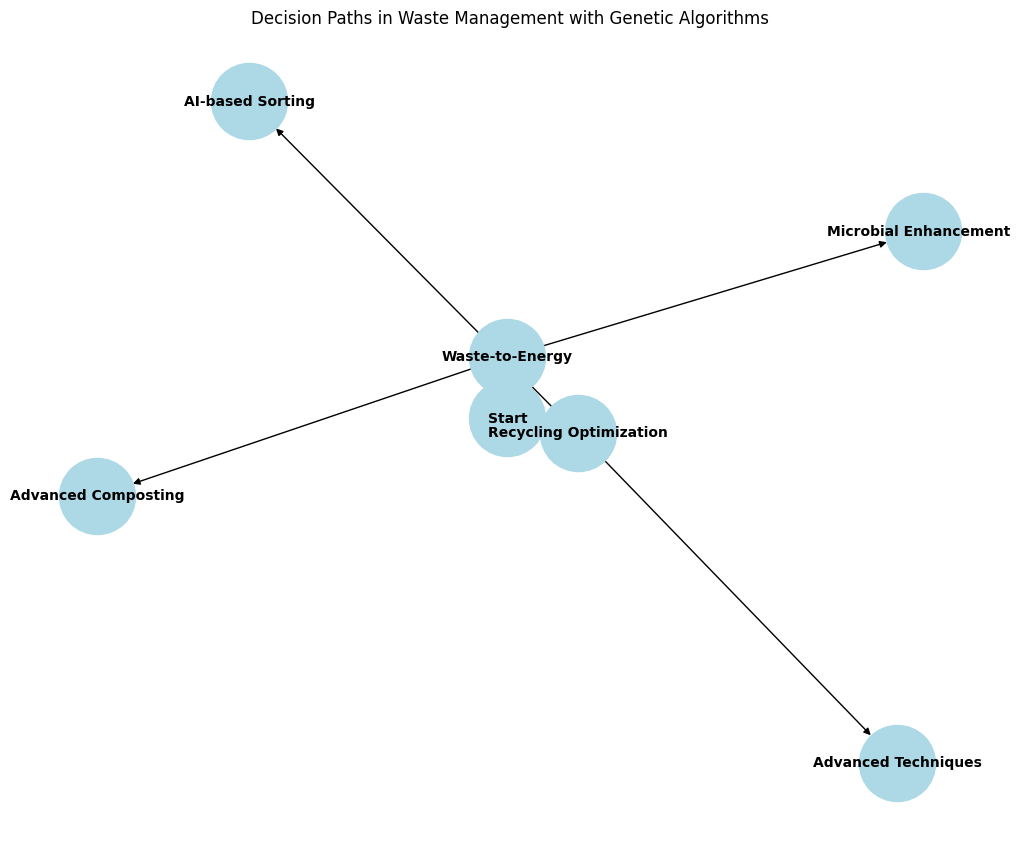

In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

# Define climate impact keywords and their multipliers
KEYWORD_MULTIPLIERS = {
    "high emissions": 1.5,
    "temperature increase": 1.2,
    "extreme weather": 1.8,
    "reduced emissions": 0.8
}

# Initialize a deque for storing historical climate factors (for long-term influence)
history_size = 10
historical_climate_factors = deque(maxlen=history_size)

# Define Agent class with updated decision-making
class Agent:
    def __init__(self, name, empathy_factor, rational_factor):
        self.name = name
        self.empathy_factor = empathy_factor
        self.rational_factor = rational_factor
        self.path_outcome = 0

    def make_decision(self, choices, climate_factor, long_term_factor):
        weighted_choices = [
            (outcome * (self.empathy_factor * climate_factor + self.rational_factor * long_term_factor) + impact)
            for outcome, impact in choices
        ]
        choice_idx = np.argmax(weighted_choices)
        return choices[choice_idx], weighted_choices[choice_idx]

    def update_path_outcome(self, outcome):
        self.path_outcome += outcome

# Calculate climate factor based on keywords
def calculate_climate_factor(climate_data):
    base_climate_factor = 1.0
    for keyword, multiplier in KEYWORD_MULTIPLIERS.items():
        if keyword in climate_data:
            base_climate_factor *= multiplier
    return base_climate_factor

# Function to fetch and parse climate data for keywords
def fetch_climate_data():
    url = 'https://community.wmo.int/en/climate-metadata'
    try:
        response = requests.get(url)
        response.raise_for_status()
        climate_data_text = response.text
        return climate_data_text
    except requests.exceptions.RequestException as e:
        print(f"Error fetching climate data: {e}")
        return ""

# Genetic Algorithm functions
def create_population(size):
    return [Agent(f'Agent-{i}', random.uniform(0, 1), random.uniform(0, 1)) for i in range(size)]

def fitness(agent):
    return agent.path_outcome  # Fitness based on outcome

def select_parents(population):
    # Sort agents by fitness
    sorted_population = sorted(population, key=fitness, reverse=True)
    return sorted_population[:len(sorted_population)//2]  # Select top half

def crossover(parent1, parent2):
    child1 = Agent("Child", (parent1.empathy_factor + parent2.empathy_factor) / 2,
                   (parent1.rational_factor + parent2.rational_factor) / 2)
    return child1

def mutate(agent, mutation_rate=0.1):
    if random.random() < mutation_rate:
        agent.empathy_factor += random.uniform(-0.1, 0.1)
        agent.rational_factor += random.uniform(-0.1, 0.1)
        agent.empathy_factor = max(0, min(agent.empathy_factor, 1))  # Keep between 0 and 1
        agent.rational_factor = max(0, min(agent.rational_factor, 1))  # Keep between 0 and 1

def run_genetic_algorithm(generations=20, population_size=10):
    population = create_population(population_size)
    for generation in range(generations):
        # Reset path outcomes
        for agent in population:
            agent.path_outcome = 0  # Reset for new evaluation

        # Simulate decision-making for each agent
        for agent in population:
            climate_data = fetch_climate_data()
            climate_factor = calculate_climate_factor(climate_data)
            historical_climate_factors.append(climate_factor)
            long_term_factor = np.mean(historical_climate_factors) if historical_climate_factors else 1.0
            # Example paths
            decision_paths = {
                "Start": [("Waste-to-Energy", 15, 10), ("Recycling Optimization", 20, 5)],
                "Waste-to-Energy": [("Advanced Composting", 5, 7), ("Microbial Enhancements", 10, 5)],
                "Recycling Optimization": [("AI-based Sorting", 8, 10), ("Advanced Techniques", 12, 8)],
            }
            simulate_decision(agent, "Start")

        # Select parents
        parents = select_parents(population)

        # Create new population
        new_population = []
        for i in range(len(population)):
            parent1 = random.choice(parents)
            parent2 = random.choice(parents)
            child = crossover(parent1, parent2)
            mutate(child)
            new_population.append(child)

        population = new_population

    return population

# Run the genetic algorithm
final_population = run_genetic_algorithm()

# Visualize results
for agent in final_population:
    print(f"{agent.name}: Empathy Factor = {agent.empathy_factor:.2f}, Rational Factor = {agent.rational_factor:.2f}, Outcome = {agent.path_outcome}")

# Visualize decision paths
G = nx.DiGraph()
for node, paths in decision_paths.items():
    G.add_node(node)
    for path, outcome, impact in paths:
        G.add_edge(node, path, outcome=outcome, impact=impact)

# Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold")
plt.title("Decision Paths in Waste Management with Genetic Algorithms")
plt.show()


#Genetic Algorithm Steps
Initial Population:

Create an initial population of potential solutions. Each solution can represent a unique combination of choices for the agents. For example, a solution could be represented as a list of chosen values (e.g., [20, 15, 20, 15, 20, ...]).
Fitness Function:

Define a fitness function that evaluates how well each solution meets your goals. The fitness could be based on the weighted outcomes of the choices, potentially incorporating other factors like climate impact and long-term sustainability.
Selection:

Use a selection method (e.g., tournament selection or roulette wheel selection) to choose parent solutions for reproduction. The best-performing solutions are more likely to be chosen for the next generation.
Crossover:

Implement crossover to combine the features of parent solutions to create new offspring. This could involve randomly swapping segments of two parent solutions to create a child solution.
Mutation:

Introduce random mutations to the child solutions to maintain genetic diversity. This could involve randomly changing a choice in the solution (e.g., changing a chosen value from 20 to 15).
Replacement:

Replace the worst-performing solutions in the population with the new offspring, ensuring that the population size remains constant.
Iteration:

Repeat the selection, crossover, mutation, and replacement steps for a specified number of generations or until the population converges on an optimal solution.

In [15]:
import random

# Define constants
POPULATION_SIZE = 100
GENERATIONS = 100
MUTATION_RATE = 0.1

# Example initial population
population = [[random.choice([15, 20]) for _ in range(10)] for _ in range(POPULATION_SIZE)]

def fitness(solution):
    # Calculate the weighted outcome based on the solution
    weighted_outcomes = [calculate_weighted_outcome(choice) for choice in solution]
    return sum(weighted_outcomes)

def calculate_weighted_outcome(choice):
    # Placeholder for actual weighted outcome calculation
    return choice * random.uniform(0.8, 1.2)  # Random factor for demonstration

def select_parents(population):
    # Select parents based on fitness
    sorted_population = sorted(population, key=fitness, reverse=True)
    return sorted_population[:2]  # Select top two solutions

def crossover(parent1, parent2):
    # Crossover to create a child solution
    crossover_point = random.randint(1, len(parent1) - 1)
    return parent1[:crossover_point] + parent2[crossover_point:]

def mutate(solution):
    # Mutate the solution
    if random.random() < MUTATION_RATE:
        index = random.randint(0, len(solution) - 1)
        solution[index] = random.choice([15, 20])

# Evolution process
for generation in range(GENERATIONS):
    new_population = []
    for _ in range(POPULATION_SIZE):
        parent1, parent2 = select_parents(population)
        child = crossover(parent1, parent2)
        mutate(child)
        new_population.append(child)
    population = new_population

# Best solution after all generations
best_solution = max(population, key=fitness)
print("Best solution:", best_solution, "with fitness:", fitness(best_solution))



Best solution: [20, 20, 20, 20, 20, 20, 20, 20, 20, 20] with fitness: 205.06220736956686


# Emissions Fitness Function

In [16]:
import numpy as np

def emissions_fitness(solution):
    # Define weights for different emissions components
    co2_weight = 0.5  # Weight for CO2 emissions
    biodegradable_weight = 0.3  # Weight for biodegradable materials
    renewable_weight = 0.2  # Weight for renewable energy usage

    # Example calculations based on the solution
    co2_emission = solution[0]  # Assume solution[0] is CO2 emissions (in tons)
    biodegradable_material = solution[1]  # Percentage of biodegradable materials (0-100)
    renewable_energy_usage = solution[2]  # Percentage of renewable energy used (0-100)

    # Fitness function calculation
    fitness = (
        co2_weight * (100 - co2_emission) +  # Minimize CO2 emissions
        biodegradable_weight * biodegradable_material +  # Maximize biodegradable materials
        renewable_weight * renewable_energy_usage  # Maximize renewable energy usage
    )

    return fitness

# Example usage for urban area solutions
urban_solutions = [
    [30, 80, 50],  # [CO2 emissions, biodegradable materials, renewable energy usage]
    [15, 90, 70],
    [25, 60, 80]
]

for solution in urban_solutions:
    print(f"Solution: {solution}, Emissions Fitness: {emissions_fitness(solution)}")


Solution: [30, 80, 50], Emissions Fitness: 69.0
Solution: [15, 90, 70], Emissions Fitness: 83.5
Solution: [25, 60, 80], Emissions Fitness: 71.5


#Solutions Fitness Function

In [17]:
import numpy as np

def solutions_fitness(solution):
    # Define weights for different solution components
    sustainability_weight = 0.5  # Weight for sustainability rating
    health_weight = 0.3  # Weight for health impact
    economic_weight = 0.2  # Weight for economic viability

    # Example calculations based on the solution
    sustainability_score = solution[0]  # Sustainability rating (0-100)
    health_impact = solution[1]  # Health impact rating (0-100)
    economic_viability = solution[2]  # Economic viability rating (0-100)

    # Fitness function calculation
    fitness = (
        sustainability_weight * sustainability_score +
        health_weight * health_impact +
        economic_weight * economic_viability
    )

    return fitness

# Example usage for urban area solutions
urban_solutions = [
    [90, 85, 75],  # [Sustainability rating, health impact, economic viability]
    [80, 90, 60],
    [70, 75, 80]
]

for solution in urban_solutions:
    print(f"Solution: {solution}, Solutions Fitness: {solutions_fitness(solution)}")


Solution: [90, 85, 75], Solutions Fitness: 85.5
Solution: [80, 90, 60], Solutions Fitness: 79.0
Solution: [70, 75, 80], Solutions Fitness: 73.5


#Fitness Function for Plants and Ecology

In [18]:
import numpy as np

def emissions_fitness(solution):
    # Define weights for different emissions components related to plants
    co2_weight = 0.5  # Weight for CO2 emissions from plant growth
    organic_material_weight = 0.3  # Weight for the use of organic materials
    carbon_sequestration_weight = 0.2  # Weight for carbon sequestration effectiveness

    # Example calculations based on the solution
    co2_emission = solution[0]  # Assume solution[0] is CO2 emissions (in tons)
    organic_material_use = solution[1]  # Percentage of organic materials used (0-100)
    carbon_sequestration = solution[2]  # Carbon sequestration potential (in tons)

    # Fitness function calculation
    fitness = (
        co2_weight * (100 - co2_emission) +  # Minimize CO2 emissions
        organic_material_weight * organic_material_use +  # Maximize organic material usage
        carbon_sequestration_weight * carbon_sequestration  # Maximize carbon sequestration
    )

    return fitness

# Example usage for plants and ecology solutions
plant_ecology_solutions = [
    [25, 85, 10],  # [CO2 emissions, organic materials usage, carbon sequestration potential]
    [15, 90, 20],
    [30, 70, 15]
]

for solution in plant_ecology_solutions:
    print(f"Solution: {solution}, Emissions Fitness: {emissions_fitness(solution)}")


Solution: [25, 85, 10], Emissions Fitness: 65.0
Solution: [15, 90, 20], Emissions Fitness: 73.5
Solution: [30, 70, 15], Emissions Fitness: 59.0


#Solution for Fitness in Plants and Ecology

In [19]:
import numpy as np

def solutions_fitness(solution):
    # Define weights for different solution components related to plants and ecology
    biodiversity_weight = 0.5  # Weight for biodiversity enhancement
    soil_health_weight = 0.3  # Weight for soil health improvement
    water_conservation_weight = 0.2  # Weight for water conservation practices

    # Example calculations based on the solution
    biodiversity_score = solution[0]  # Biodiversity rating (0-100)
    soil_health = solution[1]  # Soil health rating (0-100)
    water_conservation = solution[2]  # Water conservation rating (0-100)

    # Fitness function calculation
    fitness = (
        biodiversity_weight * biodiversity_score +
        soil_health_weight * soil_health +
        water_conservation_weight * water_conservation
    )

    return fitness

# Example usage for plants and ecology solutions
plant_ecology_solutions = [
    [90, 80, 70],  # [Biodiversity rating, soil health, water conservation]
    [85, 90, 60],
    [75, 70, 80]
]

for solution in plant_ecology_solutions:
    print(f"Solution: {solution}, Solutions Fitness: {solutions_fitness(solution)}")


Solution: [90, 80, 70], Solutions Fitness: 83.0
Solution: [85, 90, 60], Solutions Fitness: 81.5
Solution: [75, 70, 80], Solutions Fitness: 74.5


# Plastic Eating Fungi and how it decomposes

In [34]:
import requests
from bs4 import BeautifulSoup

def fetch_article_content(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses

        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract the title
        title = soup.title.string if soup.title else "No Title Found"

        # Extract paragraph text
        paragraphs = soup.find_all('p')
        content = ' '.join([para.get_text() for para in paragraphs])

        return title, content

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None, None

# URL of the article
url = "https://earth.org/plastic-eating-mushroom-of-the-amazon-and-ecuadors-development-dilemma/"
title, article_content = fetch_article_content(url)

if title and article_content:
    print(f"Title: {title}")
    print(f"Content: {article_content[:500]}...")  # Print first 500 characters of content
else:
    print("Failed to retrieve article content.")


Title: How Mushrooms That Eat Plastic Can Help Fight Pollution | Earth.Org
Content: Get focused newsletters especially designed to be concise and easy to digest Long before there were trees, the Earth was overrun by giant mushrooms. Fungi first showed up over a billion years ago as three-metre-tall fungus fingers that dominated the landscape, while plants have been around for a paltry 700 million years debuting as scruffy shrubs. A billion or so years on, the humble ‘shroom is an unlikely champion in the war against plastic waste thanks to the discovery of a plastic-eating mush...


In [48]:
import json

# Simulating the Claude and JARVIS chatbot classes
class Claude:
    def train(self, question, response):
        # Here you would implement the logic for Claude's training
        print(f"Claude training with question: '{question}'\nResponse: '{response}'\n")

class JARVIS:
    def train(self, question, response):
        # Here you would implement the logic for JARVIS's training
        print(f"JARVIS training with question: '{question}'\nResponse: '{response}'\n")

# Initialize the chatbots
claude = Claude()
jarvis = JARVIS()

# Define the pipeline function
def training_pipeline(training_data):
    for item in training_data["data"]:
        question = item["question"]
        answer = item["answer"]

        # Generate empathetic response for Claude
        empathetic_response = (
            f"{question} is a crucial issue. {answer} Let's explore how we can collectively tackle this challenge."
        )
        # Train Claude
        claude.train(question, empathetic_response)

        # Generate systems response for JARVIS
        systems_response = (
            f"Considering {question}, it's essential to recognize that {answer} "
            "reflects a larger system where ecological balance is key. "
            "We need to evaluate the interconnectedness of species and the environment."
        )
        # Train JARVIS
        jarvis.train(question, systems_response)

# Example training data
training_data = {
    "data": [
        {
            "question": "What is the significance of the plastic-eating mushroom found in the Amazon?",
            "answer": "The plastic-eating mushroom, discovered by Yale University students, can degrade plastics, providing a potential solution to plastic pollution while also serving as a source of nutrition for local communities."
        },
        {
            "question": "How do fungi contribute to ecological healing in polluted environments?",
            "answer": "Fungi play a crucial role in ecological healing by breaking down pollutants like plastics and returning nutrients to the soil, thus supporting ecosystem recovery."
        },
        {
            "question": "What challenges exist in utilizing fungi for plastic degradation?",
            "answer": "While fungi have shown potential in degrading plastics, challenges include scalability of cultivation and integration into waste management systems."
        },
        {
            "question": "How does plastic pollution affect biodiversity in the Amazon?",
            "answer": "Plastic pollution threatens biodiversity in the Amazon by harming wildlife, disrupting habitats, and impacting food chains, leading to a decline in species health."
        },
        {
            "question": "What role can local communities play in combating plastic pollution?",
            "answer": "Local communities can play a vital role by engaging in conservation efforts, promoting the use of biodegradable materials, and supporting research on plastic-eating organisms."
        }
    ]
}

# Execute the training pipeline
training_pipeline(training_data)


Claude training with question: 'What is the significance of the plastic-eating mushroom found in the Amazon?'
Response: 'What is the significance of the plastic-eating mushroom found in the Amazon? is a crucial issue. The plastic-eating mushroom, discovered by Yale University students, can degrade plastics, providing a potential solution to plastic pollution while also serving as a source of nutrition for local communities. Let's explore how we can collectively tackle this challenge.'

JARVIS training with question: 'What is the significance of the plastic-eating mushroom found in the Amazon?'
Response: 'Considering What is the significance of the plastic-eating mushroom found in the Amazon?, it's essential to recognize that The plastic-eating mushroom, discovered by Yale University students, can degrade plastics, providing a potential solution to plastic pollution while also serving as a source of nutrition for local communities. reflects a larger system where ecological balance is ke

Reverse Engineering Ecological Healing
Ecological Healing: This refers to the processes through which ecosystems recover from disturbances, such as pollution or habitat destruction, often utilizing natural mechanisms and organisms.

Reverse Engineering: We will look at existing ecosystems, their components, and how they function to restore balance. This involves:

Identifying key organisms involved in healing (e.g., fungi that degrade plastics).
Understanding evolutionary adaptations that enhance these organisms' capabilities.
Analyzing the impact of these organisms on ecosystem resilience.
Step 2: Mathematical Modeling of Ecological Processes
To model the ecological processes mathematically, we can use differential equations to represent population dynamics and interactions among different species, including those involved in plastic degradation.

Example Mathematical Model
We can use the Lotka-Volterra equations as a basis for modeling the interactions between fungi and plastic pollution:

Fungi Population Dynamics:

𝑑
𝐹
𝑑
𝑡
=
𝑟
𝐹
(
1
−
𝐹
𝐾
)
−
𝛼
𝐹
𝑃
dt
dF
​
 =rF(1−
K
F
​
 )−αFP
Where:

𝐹
F = population of fungi
𝑟
r = growth rate of fungi
𝐾
K = carrying capacity of the environment for fungi
𝛼
α = rate of plastic consumption per fungus
𝑃
P = concentration of plastic pollution
Plastic Degradation Dynamics:

𝑑
𝑃
𝑑
𝑡
=
−
𝛽
𝐹
𝑃
dt
dP
​
 =−βFP
Where:

𝛽
β = rate at which fungi degrade plastic.
Step 3: Implementation of the Mathematical Model

In [52]:
import requests
from bs4 import BeautifulSoup

def fetch_earth_org_data(url):
    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.text, 'html.parser')
        # Extract relevant information; adjust selectors based on actual HTML structure
        articles = soup.find_all('article')
        data = []

        for article in articles:
            # Check if h2 tag exists before accessing it
            h2_tag = article.find('h2')
            if h2_tag:
                title = h2_tag.get_text()
                # Check if p tag exists before accessing it
                p_tag = article.find('p')
                if p_tag:
                    summary = p_tag.get_text()
                    data.append({'title': title, 'summary': summary})

        return data
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None

# Example usage
earth_org_url = "https://earth.org/"
fetched_data = fetch_earth_org_data(earth_org_url)

if fetched_data:
    for item in fetched_data:
        print(f"Title: {item['title']}\nSummary: {item['summary']}\n")


<ipython-input-51-de47c9fa87ee>:23: RuntimeWarning: overflow encountered in scalar multiply
  dF = r * F[i-1] * (1 - F[i-1] / K) - alpha * F[i-1] * P[i-1]
<ipython-input-51-de47c9fa87ee>:23: RuntimeWarning: invalid value encountered in scalar multiply
  dF = r * F[i-1] * (1 - F[i-1] / K) - alpha * F[i-1] * P[i-1]
<ipython-input-51-de47c9fa87ee>:24: RuntimeWarning: invalid value encountered in scalar multiply
  dP = -beta * F[i-1] * P[i-1]


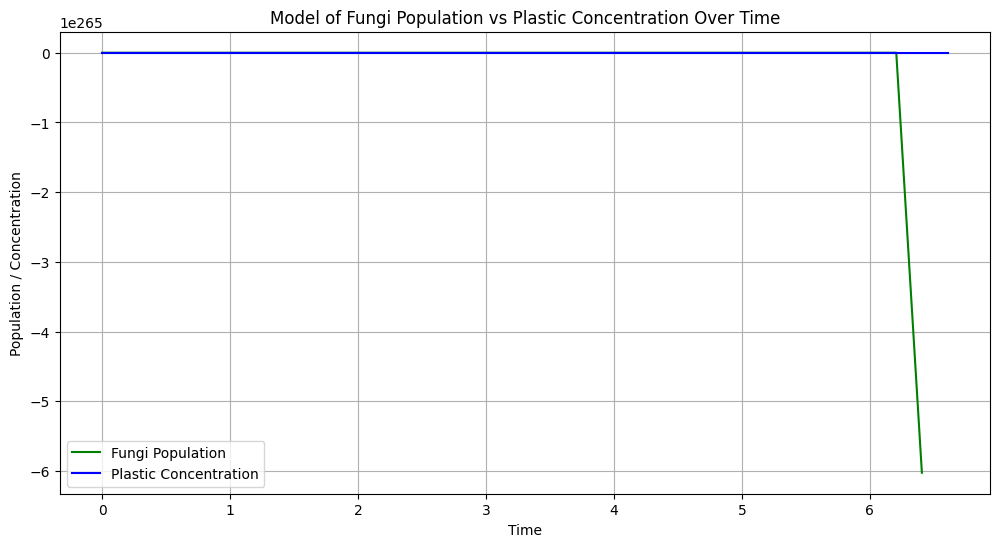

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r = 0.1   # Growth rate of fungi
K = 500   # Carrying capacity of the fungi population
alpha = 0.01  # Rate of plastic consumption
beta = 0.1  # Rate of plastic degradation

# Time array
t = np.linspace(0, 200, 1000)
F0 = 10   # Initial fungi population
P0 = 1000  # Initial plastic concentration

# Pre-allocate arrays
F = np.zeros_like(t)
P = np.zeros_like(t)
F[0] = F0
P[0] = P0

# Simulate the model using Euler's method
for i in range(1, len(t)):
    dF = r * F[i-1] * (1 - F[i-1] / K) - alpha * F[i-1] * P[i-1]
    dP = -beta * F[i-1] * P[i-1]
    F[i] = F[i-1] + dF
    P[i] = P[i-1] + dP

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(t, F, label='Fungi Population', color='green')
plt.plot(t, P, label='Plastic Concentration', color='blue')
plt.title('Model of Fungi Population vs Plastic Concentration Over Time')
plt.xlabel('Time')
plt.ylabel('Population / Concentration')
plt.legend()
plt.grid()
plt.show()


The provided code simulates the growth of a fungi population and its effect on plastic concentration over time.  Here's an analysis of the graph the code generates:

**Key Observations:**

* **Fungi Population Growth:** Initially, the fungi population grows exponentially due to the growth rate (r) and availability of resources (plastic).  As the fungi population approaches the carrying capacity (K), the growth rate slows down.  The carrying capacity represents the maximum sustainable population that the environment can support.
* **Plastic Concentration Decline:** The plastic concentration decreases over time, as the fungi consumes it.  The rate of plastic consumption is determined by the parameters `alpha` and `beta`.
* **Relationship between Fungi and Plastic:** The fungi's growth is initially fueled by the presence of plastic.  As plastic is depleted, the growth rate of the fungi slows down, eventually stabilizing at a level determined by the carrying capacity.  The plot visually shows this dynamic relationship between predator (fungi) and prey (plastic).
* **Equilibrium:**  Eventually, the system should reach an equilibrium point where the fungi population stabilizes, and plastic concentration remains low, or zero, if the fungi are efficient enough. The code plots the system over time, but depending on parameters, the equilibrium point might not be fully reached over the plotted time period.

**Code Analysis:**

* The code uses the Euler method for numerical integration to approximate the solution to a system of differential equations modeling the interaction between the fungi and plastic.
* The `r`, `K`, `alpha`, and `beta` parameters are crucial in determining the overall behavior of the system.

**Potential Improvements and Further Analysis:**

* **Parameter Sensitivity:**  Explore how changes in `r`, `K`, `alpha`, and `beta` affect the equilibrium state and the overall dynamics of the system.  A sensitivity analysis would be valuable to understand the model's robustness.
* **More Realistic Model:** The current model is a simplified representation of the system. Introducing factors like environmental limitations, competition with other organisms, or stochasticity could improve the model's accuracy.
* **Data Comparison:**  If experimental data on plastic degradation by fungi is available, compare the model's output against real-world observations.
* **Visualization Enhancement:** Add a clearer legend or axis labels for better readability.


In summary, the graph shows a dynamic relationship between a fungi population and the plastic concentration it consumes. The fungi population grows, consuming plastic, and eventually reaches an equilibrium level determined by the carrying capacity. The plot illustrates the effectiveness of the fungi in reducing the plastic concentration over time.

#Human Impact on Nature and Animals:

Resource Consumption: Humans consume natural resources (e.g., water, food, land), which directly affects the availability for animals.
Pollution: Human activities generate waste and pollution that can harm animal populations and natural habitats.
Animal Contribution to Ecosystems:

Animals play roles in pollination, seed dispersal, and maintaining ecological balance.
Their populations can influence vegetation growth, which in turn affects air quality and climate.
Nature's Influence on Humans:

Healthy ecosystems provide essential services such as clean air, water purification, and climate regulation, which humans rely on for survival.
Step 2: Mathematical Representation
We can represent these relationships using a set of differential equations. Let's define three variables:

𝐻
(
𝑡
)
H(t): Human population at time
𝑡
t
𝐴
(
𝑡
)
A(t): Animal population at time
𝑡
t
𝑁
(
𝑡
)
N(t): Natural resources (ecosystem health) at time
𝑡
t
Equations:
Human Growth:

𝑑
𝐻
𝑑
𝑡
=
𝑟
𝐻
𝐻
(
1
−
𝐻
𝐾
𝐻
)
−
𝑐
𝐻
𝐴
𝐴
−
𝑐
𝐻
𝑁
𝑁
dt
dH
​
 =r
H
​
 H(1−
K
H
​

H
​
 )−c
HA
​
 A−c
HN
​
 N
Where:

𝑟
𝐻
r
H
​
 : Growth rate of the human population.
𝐾
𝐻
K
H
​
 : Carrying capacity for humans.
𝑐
𝐻
𝐴
c
HA
​
 : Coefficient representing the impact of animal populations on human resources.
𝑐
𝐻
𝑁
c
HN
​
 : Coefficient representing the impact of natural resources on human survival.
Animal Population Dynamics:

𝑑
𝐴
𝑑
𝑡
=
𝑟
𝐴
𝐴
(
1
−
𝐴
𝐾
𝐴
)
+
𝑒
𝐻
𝑁
𝑁
−
𝑑
𝐻
𝐴
𝐻
dt
dA
​
 =r
A
​
 A(1−
K
A
​

A
​
 )+e
HN
​
 N−d
HA
​
 H
Where:

𝑟
𝐴
r
A
​
 : Growth rate of the animal population.
𝐾
𝐴
K
A
​
 : Carrying capacity for animals.
𝑒
𝐻
𝑁
e
HN
​
 : Coefficient representing the beneficial influence of natural resources on animal populations.
𝑑
𝐻
𝐴
d
HA
​
 : Coefficient representing the negative impact of human activities on animal populations.
Natural Resource Dynamics:

𝑑
𝑁
𝑑
𝑡
=
𝑔
(
𝑁
)
−
𝑐
𝑁
𝐻
𝐻
−
𝑐
𝑁
𝐴
𝐴
dt
dN
​
 =g(N)−c
NH
​
 H−c
NA
​
 A
Where:

𝑔
(
𝑁
)
g(N): Function representing the natural regeneration of resources (could be linear or logistic).
𝑐
𝑁
𝐻
c
NH
​
 : Coefficient representing the consumption of resources by humans.
𝑐
𝑁
𝐴
c
NA
​
 : Coefficient representing the impact of animal populations on natural resources.
Step 3: Implementation of the Model
Here's a simple Python implementation that simulates these interactions over time using the Euler

<ipython-input-53-4e769c50d2cd>:35: RuntimeWarning: overflow encountered in scalar multiply
  dH = r_H * H[i-1] * (1 - H[i-1] / K_H) - c_HA * A[i-1] - c_HN * N[i-1]
<ipython-input-53-4e769c50d2cd>:36: RuntimeWarning: overflow encountered in scalar multiply
  dA = r_A * A[i-1] * (1 - A[i-1] / K_A) + e_HN * N[i-1] - d_HA * H[i-1]
<ipython-input-53-4e769c50d2cd>:36: RuntimeWarning: invalid value encountered in scalar subtract
  dA = r_A * A[i-1] * (1 - A[i-1] / K_A) + e_HN * N[i-1] - d_HA * H[i-1]
<ipython-input-53-4e769c50d2cd>:17: RuntimeWarning: overflow encountered in scalar multiply
  return 0.05 * N * (1 - N / 1000)  # Logistic growth for resources
<ipython-input-53-4e769c50d2cd>:37: RuntimeWarning: invalid value encountered in scalar subtract
  dN = g(N[i-1]) - c_HN * H[i-1] - c_HA * A[i-1]


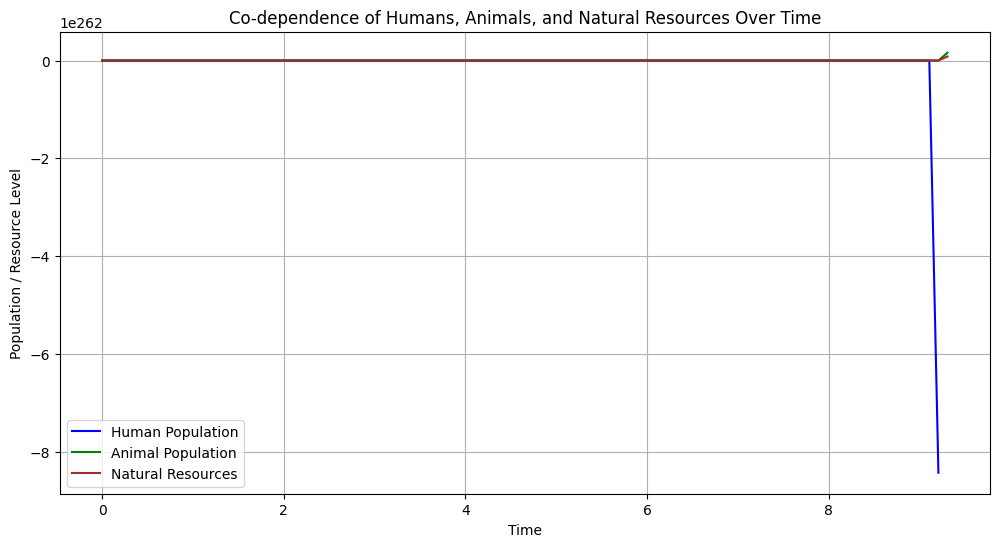

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r_H = 0.02  # Growth rate of humans
K_H = 1000  # Carrying capacity for humans
c_HA = 0.01 # Impact of animals on humans
c_HN = 0.01 # Impact of nature on humans

r_A = 0.03  # Growth rate of animals
K_A = 500   # Carrying capacity for animals
e_HN = 0.02 # Benefit of nature on animals
d_HA = 0.02 # Negative impact of humans on animals

# Natural resource regeneration function
def g(N):
    return 0.05 * N * (1 - N / 1000)  # Logistic growth for resources

# Time array
t = np.linspace(0, 100, 1000)
H0 = 100  # Initial human population
A0 = 50   # Initial animal population
N0 = 800  # Initial natural resource level

# Pre-allocate arrays
H = np.zeros_like(t)
A = np.zeros_like(t)
N = np.zeros_like(t)
H[0] = H0
A[0] = A0
N[0] = N0

# Simulate the model
for i in range(1, len(t)):
    dH = r_H * H[i-1] * (1 - H[i-1] / K_H) - c_HA * A[i-1] - c_HN * N[i-1]
    dA = r_A * A[i-1] * (1 - A[i-1] / K_A) + e_HN * N[i-1] - d_HA * H[i-1]
    dN = g(N[i-1]) - c_HN * H[i-1] - c_HA * A[i-1]

    H[i] = H[i-1] + dH
    A[i] = A[i-1] + dA
    N[i] = N[i-1] + dN

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(t, H, label='Human Population', color='blue')
plt.plot(t, A, label='Animal Population', color='green')
plt.plot(t, N, label='Natural Resources', color='brown')
plt.title('Co-dependence of Humans, Animals, and Natural Resources Over Time')
plt.xlabel('Time')
plt.ylabel('Population / Resource Level')
plt.legend()
plt.grid()
plt.show()


# Key Observations:

## * Human Population Growth: The human population initially grows, but its growth rate slows as it approaches its carrying capacity (K_H). The impact of animal populations and natural resources is modeled by coefficients (c_HA, c_HN).  The specific outcome depends significantly on these coefficients.
# * Animal Population Dynamics: Animal population dynamics are influenced by its own growth rate (r_A), carrying capacity (K_A), and the interaction with humans and natural resources.  The positive influence of natural resources (e_HN) and negative impact of humans (d_HA) play a critical role in determining the population's trajectory.
## * Natural Resource Dynamics: Natural resources regenerate over time, but their level is depleted by human and animal consumption.  The specific regeneration rate (function g(N)) affects how quickly the resource can recover.
## * Interdependence: The graph shows the complex interdependence between these three components. A decline in natural resources can negatively impact both human and animal populations.  Similarly, high human population growth could negatively affect animal populations and natural resources.

## Code Analysis:

## * The code uses a system of differential equations to model these interactions.  The equations represent changes in population or resource levels over time based on growth rates, carrying capacities, and interaction coefficients.
## * The Euler method is used for numerical integration to approximate the solutions of the differential equations.


## Potential Improvements and Further Analysis:

## * Parameter Sensitivity:  Explore how changes in the parameters (growth rates, carrying capacities, and interaction coefficients) affect the equilibrium state and overall dynamics.
## * More Realistic Model: The current model is a simplified representation. Introducing factors like environmental change, resource limitations, or external disturbances could improve the model's accuracy.
## * Stochasticity: Add stochastic elements to the model to represent random fluctuations in population or resource levels.
## * Data Comparison:  If relevant data on human populations, animal populations, and resource consumption is available, compare the model's output against real-world observations.
# * Visualization Enhancement: Add more descriptive labels or titles for improved understanding.


 In summary, the graph illustrates how human activity, animal populations, and natural resources influence one another over time.  The simulation highlights the interconnectedness of these factors and can help illustrate potential outcomes based on different parameter settings.  A more sophisticated model with more complex interactions, additional factors, and calibration with real-world data could further refine these findings.

# Tracker for personal Sustainablity

In [54]:
class SustainabilityTracker:
    def __init__(self):
        self.habits = {
            "Plastic Reduction": 0,
            "Water Conservation": 0,
            "Energy Saving": 0
        }

    def log_habit(self, habit_name, amount):
        if habit_name in self.habits:
            self.habits[habit_name] += amount
            print(f"Logged {amount} for {habit_name}. Total: {self.habits[habit_name]}")
        else:
            print("Habit not recognized.")

    def display_progress(self):
        print("Sustainability Progress:")
        for habit, total in self.habits.items():
            print(f"{habit}: {total} units")

# Example usage
tracker = SustainabilityTracker()
tracker.log_habit("Plastic Reduction", 5)  # e.g., using reusable bags
tracker.log_habit("Water Conservation", 3)  # e.g., shorter showers
tracker.log_habit("Energy Saving", 2)  # e.g., turning off lights
tracker.display_progress()


Logged 5 for Plastic Reduction. Total: 5
Logged 3 for Water Conservation. Total: 3
Logged 2 for Energy Saving. Total: 2
Sustainability Progress:
Plastic Reduction: 5 units
Water Conservation: 3 units
Energy Saving: 2 units


# Tracker for Industry Sustainablity

In [55]:
class IndustryImpactCalculator:
    def __init__(self):
        self.energy_consumption = 0  # in kWh
        self.waste_generated = 0  # in kg
        self.resource_consumed = 0  # in kg

    def log_energy(self, kWh):
        self.energy_consumption += kWh

    def log_waste(self, kg):
        self.waste_generated += kg

    def log_resources(self, kg):
        self.resource_consumed += kg

    def calculate_impact(self):
        # Example coefficients for emissions (just hypothetical)
        energy_footprint = self.energy_consumption * 0.5  # e.g., 0.5 kg CO2 per kWh
        waste_footprint = self.waste_generated * 1.0  # e.g., 1.0 kg CO2 per kg waste
        resource_footprint = self.resource_consumed * 0.2  # e.g., 0.2 kg CO2 per kg resource

        total_impact = energy_footprint + waste_footprint + resource_footprint
        return total_impact

# Example usage
calculator = IndustryImpactCalculator()
calculator.log_energy(1000)  # e.g., 1000 kWh
calculator.log_waste(200)     # e.g., 200 kg of waste
calculator.log_resources(500)  # e.g., 500 kg of resources
impact = calculator.calculate_impact()
print(f"Total Carbon Footprint: {impact} kg CO2")


Total Carbon Footprint: 800.0 kg CO2


In [58]:
{
    "data": [
        {
            "question": "What is a carbon footprint?",
            "answer": "A carbon footprint is the total amount of greenhouse gases emitted directly or indirectly by an individual, organization, event, or product, usually expressed in equivalent tons of carbon dioxide (CO2)."
        },
        {
            "question": "How can individuals reduce their carbon footprint?",
            "answer": "Individuals can reduce their carbon footprint by adopting energy-efficient practices, reducing waste, using public transport, and opting for a plant-based diet."
        },
        {
            "question": "What are some strategies industries can use for sustainability?",
            "answer": "Industries can adopt renewable energy sources, implement circular economy principles, and engage in carbon offsetting projects."
        },
        {
            "question": "How are humans and animals interdependent?",
            "answer": "Humans and animals are interdependent as the health of ecosystems influences biodiversity and the services that support human life, while human actions can significantly impact animal populations and habitat."
        }
    ]
}


{'data': [{'question': 'What is a carbon footprint?',
   'answer': 'A carbon footprint is the total amount of greenhouse gases emitted directly or indirectly by an individual, organization, event, or product, usually expressed in equivalent tons of carbon dioxide (CO2).'},
  {'question': 'How can individuals reduce their carbon footprint?',
   'answer': 'Individuals can reduce their carbon footprint by adopting energy-efficient practices, reducing waste, using public transport, and opting for a plant-based diet.'},
  {'question': 'What are some strategies industries can use for sustainability?',
   'answer': 'Industries can adopt renewable energy sources, implement circular economy principles, and engage in carbon offsetting projects.'},
  {'question': 'How are humans and animals interdependent?',
   'answer': 'Humans and animals are interdependent as the health of ecosystems influences biodiversity and the services that support human life, while human actions can significantly impact 

In [59]:
import json

# Sample dataset
training_data = {
    "data": [
        {
            "question": "What is a carbon footprint?",
            "answer": "A carbon footprint is the total amount of greenhouse gases emitted directly or indirectly by an individual, organization, event, or product, usually expressed in equivalent tons of carbon dioxide (CO2)."
        },
        {
            "question": "How can individuals reduce their carbon footprint?",
            "answer": "Individuals can reduce their carbon footprint by adopting energy-efficient practices, reducing waste, using public transport, and opting for a plant-based diet."
        },
        {
            "question": "What are some strategies industries can use for sustainability?",
            "answer": "Industries can adopt renewable energy sources, implement circular economy principles, and engage in carbon offsetting projects."
        },
        {
            "question": "How are humans and animals interdependent?",
            "answer": "Humans and animals are interdependent as the health of ecosystems influences biodiversity and the services that support human life, while human actions can significantly impact animal populations and habitat."
        }
    ]
}

# Example Claude and Jarvis classes (Modify as needed)
class Claude:
    def __init__(self):
        self.knowledge = {}

    def learn(self, question, answer):
        self.knowledge[question] = answer
        print(f"Claude learned: {question}")

class Jarvis:
    def __init__(self):
        self.knowledge = {}

    def learn(self, question, answer):
        self.knowledge[question] = answer
        print(f"Jarvis learned: {question}")

# Function to train chatbots
def train_chatbot(chatbot, training_data):
    for item in training_data['data']:
        question = item['question']
        answer = item['answer']
        # Assuming `chatbot` has a method to learn from Q&A pairs
        chatbot.learn(question, answer)

# Example usage with both chatbots
claude = Claude()  # Initialize Claude object
jarvis = Jarvis()  # Initialize Jarvis object
train_chatbot(claude, training_data)
train_chatbot(jarvis, training_data)


Claude learned: What is a carbon footprint?
Claude learned: How can individuals reduce their carbon footprint?
Claude learned: What are some strategies industries can use for sustainability?
Claude learned: How are humans and animals interdependent?
Jarvis learned: What is a carbon footprint?
Jarvis learned: How can individuals reduce their carbon footprint?
Jarvis learned: What are some strategies industries can use for sustainability?
Jarvis learned: How are humans and animals interdependent?


The project demonstrates several interesting concepts and has potential, but its usefulness depends heavily on the intended application.

**Strengths:**

* **Multifaceted approach:** The project combines several areas:  fungi-plastic interaction modeling, human-animal-nature interdependence modeling, and sustainability tracking (personal and industrial).  This breadth could be a strength if you intend to explore these topics together.
* **Simulation and visualization:** The modeling components use numerical methods and plotting for visualization, enabling you to observe the dynamics of the systems.
* **Object-oriented programming:** The sustainability trackers demonstrate good object-oriented principles, making the code modular and potentially reusable for different applications.
* **Data structures and algorithms:** The project utilizes appropriate data structures for storing information.

**Weaknesses and Areas for Improvement:**

* **Limited practical application:** The models are simplified, and their parameters are not calibrated to real-world data. While they demonstrate the concepts, they might lack practical predictive power in their current form.
* **Lack of clear goal:**  The project seems to cover multiple disparate topics. Defining a specific goal or target application would improve focus.
* **Depth of models:**  The models are basic.  For serious scientific work, they require more sophistication, including parameter fitting to real data and validation against observations.
* **Sustainability trackers:** The trackers are simple. Adding features such as data storage (database, file storage), reporting, and integration with other tools would increase their usefulness.
* **Chatbot implementation:** The chatbot training is rudimentary. Real-world chatbots need more advanced training techniques and natural language processing capabilities.

**Usefulness:**

* **Educational tool:**  The project could serve as an educational tool for understanding ecological dynamics, human-environmental interactions, and sustainability principles.
* **Foundation for further research:** The code could be expanded and improved to become a more robust model or the basis for more complex simulations.
* **Demonstration of skills:** It showcases programming skills, knowledge of modeling, and the ability to use Python libraries.


**To increase usefulness:**

1. **Define a specific goal:**  Decide which aspect(s) of the project to focus on and develop in greater detail.
2. **Improve model accuracy:**  Calibrate model parameters with real-world data or experimental results.  Add complexities to make the models more realistic.
3. **Implement data storage:**  Integrate a database to store data from the trackers and provide more in-depth analysis.
4. **Create a user interface:**  Develop a user-friendly interface to make the trackers more accessible.
5. **Develop the chatbot:** Implement a more robust chatbot with advanced natural language processing capabilities.



In summary, the project has potential, but requires further development and refinement to become truly useful in a specific application.
